<a href="https://colab.research.google.com/github/DANU011/practice-analysis/blob/main/bigdata/bigdata_chap5_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 머신러닝 분석 프로세스  
① 데이터 확인 - 연속형/범주형/회귀/분류/비지도
  - 독립변수, 종속변수 확인
  - 연속형 vs 범주형 확인
  - 적용 가능한 분석모델 확인(회귀ㆍ분류ㆍ비지도 학습)  

종속변수의 특성이 연속형이라면 회귀분석 적용, 범주형이라면 분류분석 적용, 종속변수가 없다면 비지도학습 적용  
독립변수의 특성이 범주형이라며 이를 분석에 활용하도록 전처리해야함.

② 데이터 분할 - 학습ㆍ검증ㆍ평가세트/교차검증 방법
  - 학습세트 : 60-80%
  - 검증세트 : 10-20%
  - 평가세트 : 10-20%
  - 교차검증방법 적용 가능

데이터 분할을 한 번만 수행하면 머신러닝 분석결과가 데이터 분할에 의존하게 됨.  
이러한 문제를 해결하려면 다수의 학습-검증-평가데이터 세트가 필요함.  
데이터의 크기가 작거나 검증 결과를 일반화하기 위해 교차검증방법을 적용.  

③ 전처리 - 정규화/표준화/결측치 - 이상치 처리
  - 표준화(평균 0, 표준편차 1) 또는 MinMax 정규화
  - 결측치 확인 후 처리
  - 이상치 확인 후 처리

독립변수에 범주형 변수가 있을 경우, 원핫인코딩 방법으로 데이터 변경.  
원핫인코딩은 데이터를 분할하기 전에수행하는것이 좋음.  
변수마다 단위 특성에 차이가 클 때 분석 결과에 영향을 줄 수 있음으로 정규화 또는 표준화를 적용함.
결측치와 이상치가 발견된다면 분석가의 판단과 도메인 상황에 따라 적절한 방법으로 철리해야 한다.
  
④ 모델학습 - 회귀/분류/비지도 하이퍼파라미터 조절
  - 머신러닝 알고리즘 적용
  - 회귀/분류/비지도 학습
  - 최적모델을 결정하기 위해 하이퍼파라미터 탐색ㆍ조절

머신러닝 알고리즘을 학습데이터세트에 적용하는 단계.  
학습데이터세트로 학습을 수행한 뒤, 검증데이터세트로 학습결과를 확인하고 하이퍼파라미터를 적용하는 과정을 거친다.  
다양한 하이퍼파라미터를 적용해봄으로써 최적의 하이퍼파라미터를 탐색해볼 수 있다.  

⑤ 성능평가 - 분석 정확도 확인/알고리즘 성능 제시
  - 평가세트에 최종모델을 적용
  - 평가세트에 대한 정확도를 머심러닝 분석에 대한 성능으로 제시

최적의 하이퍼파라미터 및 최종모델을 결정하는 단계.
최종모델에 평가데이터세트를 적용하여 머신러닝 알고리즘의 예측성능을 평가한다.  
평가데이터세트에 대한 정확도를 머신러닝 분석에 대한 최종성능으로 제시.  
성능평가 단계에서 학습데이터세트와 검증데이터세트를 사용하지 않도록 주의해야함.  
    


## 성능평가 기법

### 회귀분석
#### MAE(Mean Absolute Error)
실젯값과 예측밧의 차이를 절댓값으로 변환해 평균한 것  
  - 에러의 크기가 그대로 반영
  - 이상치에 영향을 받음


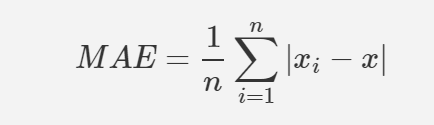

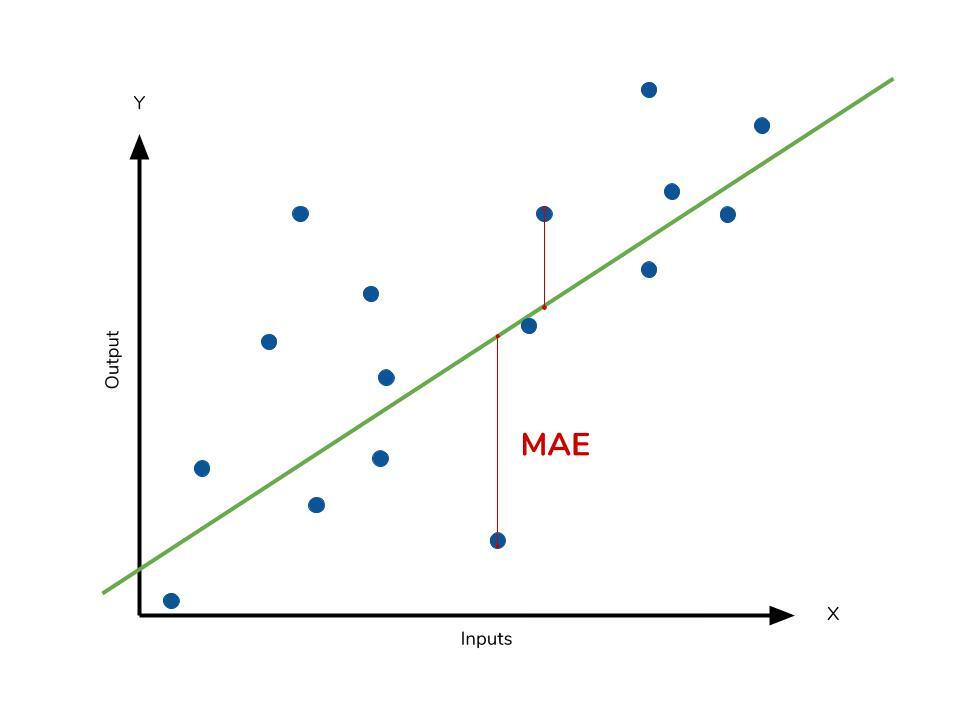

In [ ]:
# sklearn API call
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

#### MSE(Mean Squared Error)
실젯값과 예측값의 차이를 제곱해 평균한 것
  - 실젯값과 예측값 차이의 면적 합을 의미
  - 특이값이 존재하면 수치가 증가

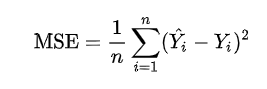

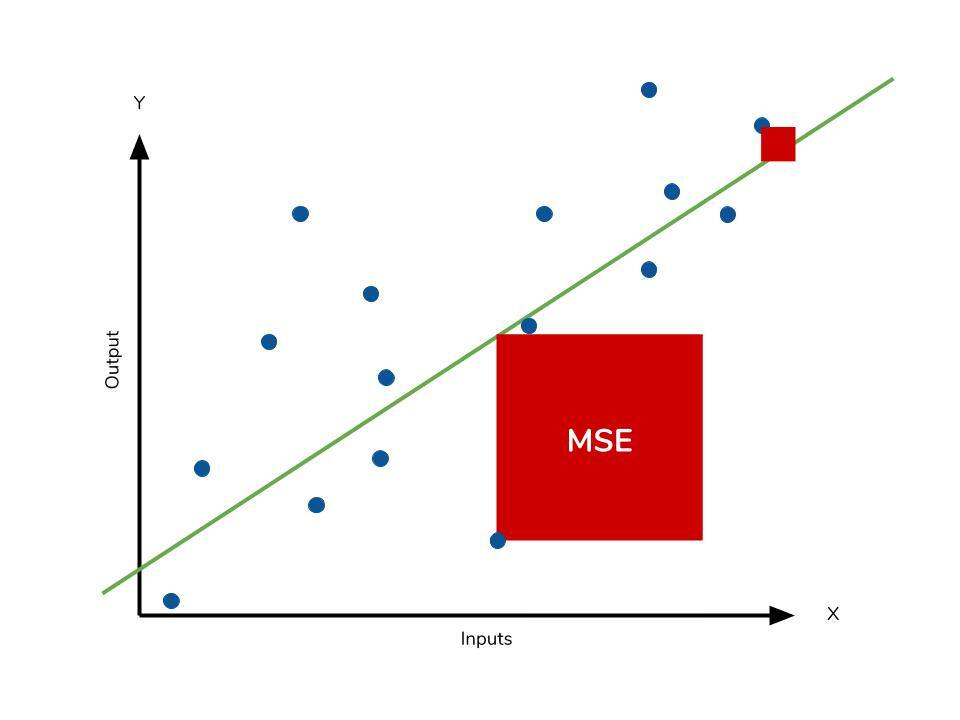

In [ ]:
# sklearn API call
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

#### RMSE(Root Mean Squated Error)
실젯값과 예측값의 차이를 제곱해 평균한 것에 루트를 씌운 것
  - 에러에 제곱을 하면 에러가 클수록 그에 따른 가중치가 높이 반영
  - 이때, 손실이 기하급수적으로 커지지 않도록 상쇟기 위해 사용

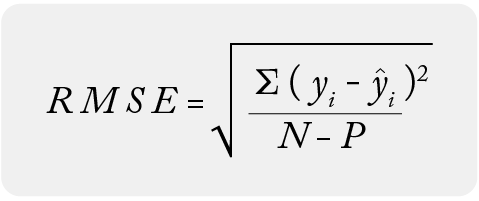

In [ ]:
from sklearn.metrics import mean_squated_error
import numpy as np

mae = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

#### MSLE(Mean Squated Log Error)
실젯값과 예측값의 차이를 제곱해 평균한 것에 로그를 적용한 것
  - RSME와 같이 손실이 기하급수적으로 증가하는 상황에서 실제 오류평균보다 값이 더 커지지 않도록 상쇄하기 위해 사용

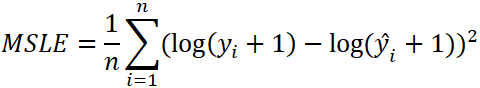

In [ ]:
from sklearn.metrics import mean_squared_log_error

msle = mean_squared_log_error(y_test, y_pred)

#### MAPE(Mean Absoulte Percentage Error)
MAE를 퍼센트로 변환한 것
  - 오차가 예측값에서 차지하는 정도를 나타냄

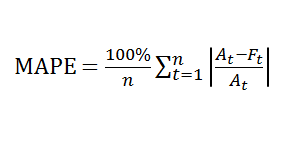

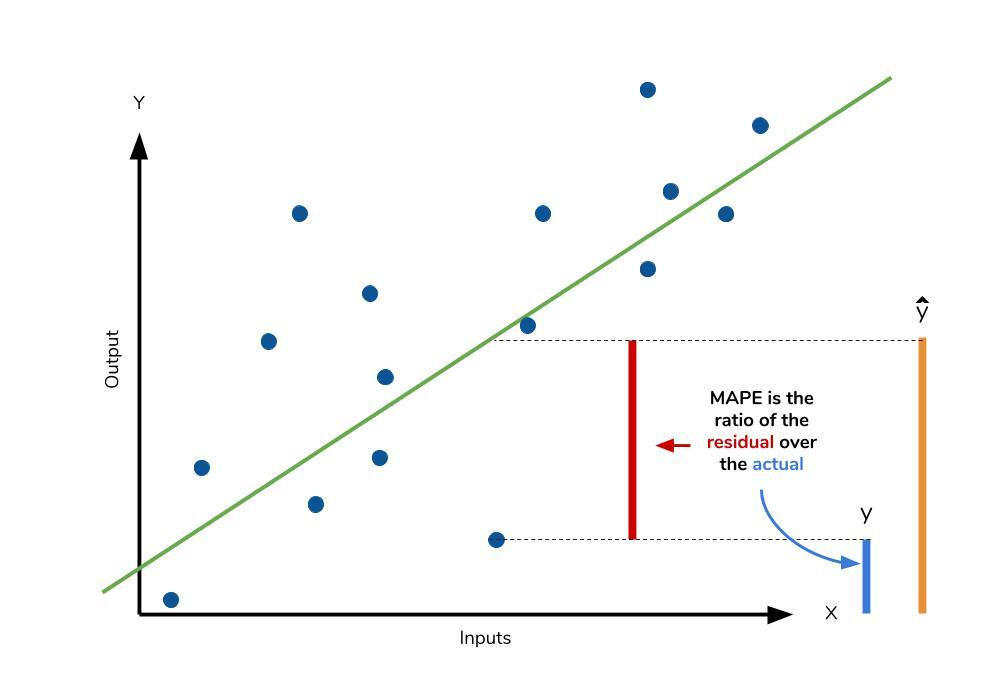

In [ ]:
import numpy as np

def MAPE(y_test, y_pred) :
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
  return mape

mape = MAPE(y_test, y_pred)

### 분류분석
#### 정확도(Accuracy)
실제 데이터에서 예측 데이터가 얼마나 같은지 판단하는 지표
  - 데이터 구성에 따라 머신러닝 모델의 성능을 왜곡할 가능성이 있음.

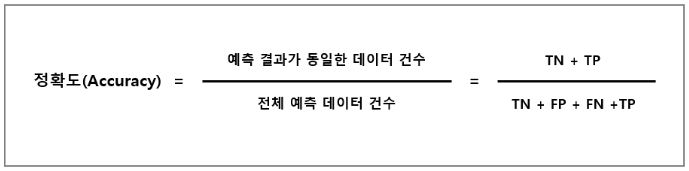

In [ ]:
from sklearn.metrics import accuracy_score

acc = acurracy_score(y_test, y_pred)

#### 혼동행렬(Confusion Matrix)
이진 분류의 예측오류가 얼마이고 어떠한 유형의 예측 오류가 발생하고 있는지 나타내는 지표
  - 4분면 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떠한 유형을 가지고 매핑되는지 나타냄

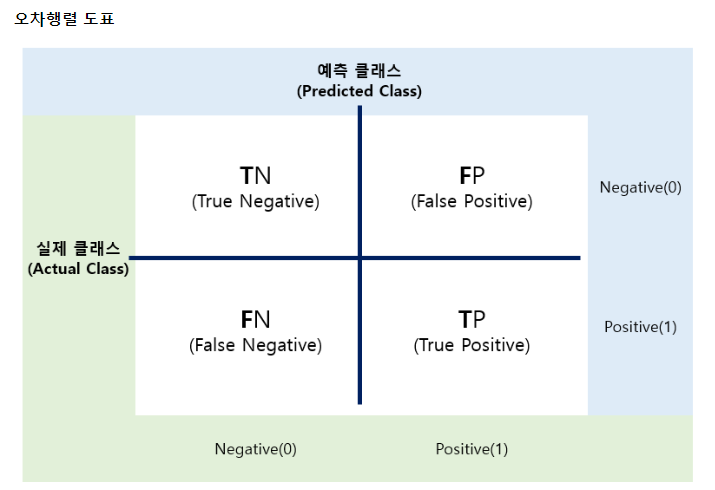

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
array([[218, 0],
       [37,  0]], dtype = int64)

#### 정밀도
Positive로 예측한 것들 중 실제로도 Positive인 것들의 비율
  - Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가지표
  - 양성 예측도라 불림
  - 정밀도가 상대적인 중요성을 가지는 경우 : 실제 Negative인 데이터를 Positive로 잘못 예측했을 때 업무상 큰 영향이 발생할 때

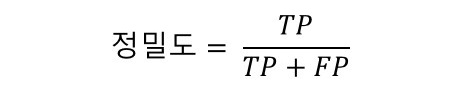

In [ ]:
from sklearn.metrics import precision_score

precision = precision_socre(y_test, y_pred)

#### 재현율
실제 Positive인 것들 중 Positive로 예측한 것들의 비율
  - 민간도(Sensitivitiy) 또는 TPR(True Positive Rate)라고 부림
  - 재현율이 상대적인 중요성을 가지는 경우 : 실제 Positive인 데이터를 Negative로 잘못 예측했을 때 업무상 큰 영향이 발생할 때

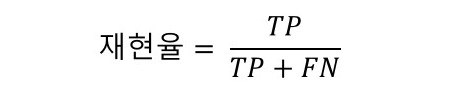

In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)

#### 정밀도와 재현율의 상충관계 - 트레이드오프(Trade-off)
분류 결정 임곗값(Threshold)을 조정함으로써 정밀도 또는 재현율의 수치를 조절할 수 있다. 하지만 둘은 상충관계인 성능평가치표이기 때문에 한쪽을 강제로 높이면 다른 하나의 수치가 떨어진다. 분석 상황에 따라 조절할 수 있지만, 하나만을 강조해서는 안된ㄷ. 두 평가지표의 수치가 적절한 조화를 이루어 종합적으로 분류모델의 성능을 평가해야 한다.

#### F1 스코어
정밀도와 재현율을 결합한 분류 성능지표  
실제 Positive인 것들 중 Positive로 예측한 것들의 비율  
  - 정밀도와 재현율이 어느 한쪽으로 치우치지 않고 적절한 조화를 이룰 때 상대적으로 높은 수치를 나타냄

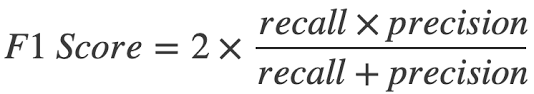

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

#### ROC 곡선과 AUC 스코어
① ROC 곡선
이진 분류모델의 주요 성능평가지표  
FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 변하는 것을 나타내는 곡선(ROC)
  - TPR을 y축으로, FPR을 x축으로 하는 그래프
  - 분류 결정 임곗값을 조절하면서 FPR이 0부터 1까지 변할 때 TPR의 변화값을 그래프에 나타냄
  - 우상향 그래프로 그려짐

# **TNR = TN / (FP + TN)**
# **FPR = FP / (FP + TN) = 1 - TNR**

In [ ]:
from sklearn.metrics import roc_curve

# FRP, TPR, 임곗값 할당
fpr, tpr, thres = roc_curve(y_test, y_pred, pos_label = 1)

# ROC 곡선 그리기
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)

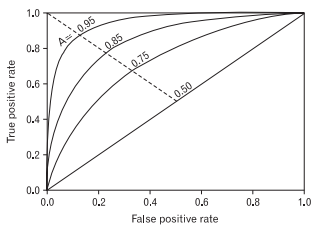

② AUC 스코어
ROC 곡선 자체는 FPR과 TPR의 변화 값을 보는 데 이용한다.  
ROC 곡선 아래의 면적 값을 분류성능지표로서 사용할 수 있다.  
Area Under the ROC Curve  
ROC 곡선 아래의 면적  
1에 가까울수록 예측성능이 우수하다고 판단  
  - AUC 값이 커지려면 FPR이 작을 때 TPR 값이 커야함
  - 우상향 직선에서 멀어지고 왼쪽 상단의 모서리 쪽으로 가파르게 곡선이 이동할수록 AUC가 1에 가까워짐
  - 랜덤 수준의 AUC값은 0.5

In [ ]:
from sklearn.metrics import roc_curve, auc

# FRP, TPR, 임곗값 할당
fpr, tpr, thres = roc_curve(y_test, y_pred, pos_label = 1)

# AUC 값
auc = auc(fpr, tpr)

### 회귀분석
#### 캘리포니아 주택가격 데이터

In [4]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

california = fetch_california_housing()
california_dt = california.data # 독립변수 만으로 된 numpy 형태
price = california.target # 종속변수 값을 numpy 형태

df = pd.DataFrame(california_dt, columns = california.feature_names)
df['PRICE'] = price

In [9]:
# head 확인
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


변수 구분과 내용
  - MedInc (중간 소득) : 중간 소득.  
  - HouseAge (주택 연식) : 주택의 중간 연식.  
  - AveRooms (평균 방 개수) : 주택 내의 평균 방 개수.  
  - AveBedrms (평균 침실 개수) : 주택 내의 평균 침실 개수.  
  - Population (인구) : 해당 지역의 인구 수.  
  - AveOccup (평균 자가 비율) : 주택의 평균 자가 비율.  
  - Latitude (위도) : 주택의 위도.  
  - Longitude (경도) : 주택의 경도.  
  - MedHouseVal (중간 주택 가격) : 중간 주택 가격(타겟 변수).  

In [10]:
# 데이터 형태 확인
df.shape

(20640, 9)

In [11]:
# 데이터 타입과 null값 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [12]:
# 결측치 확인
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

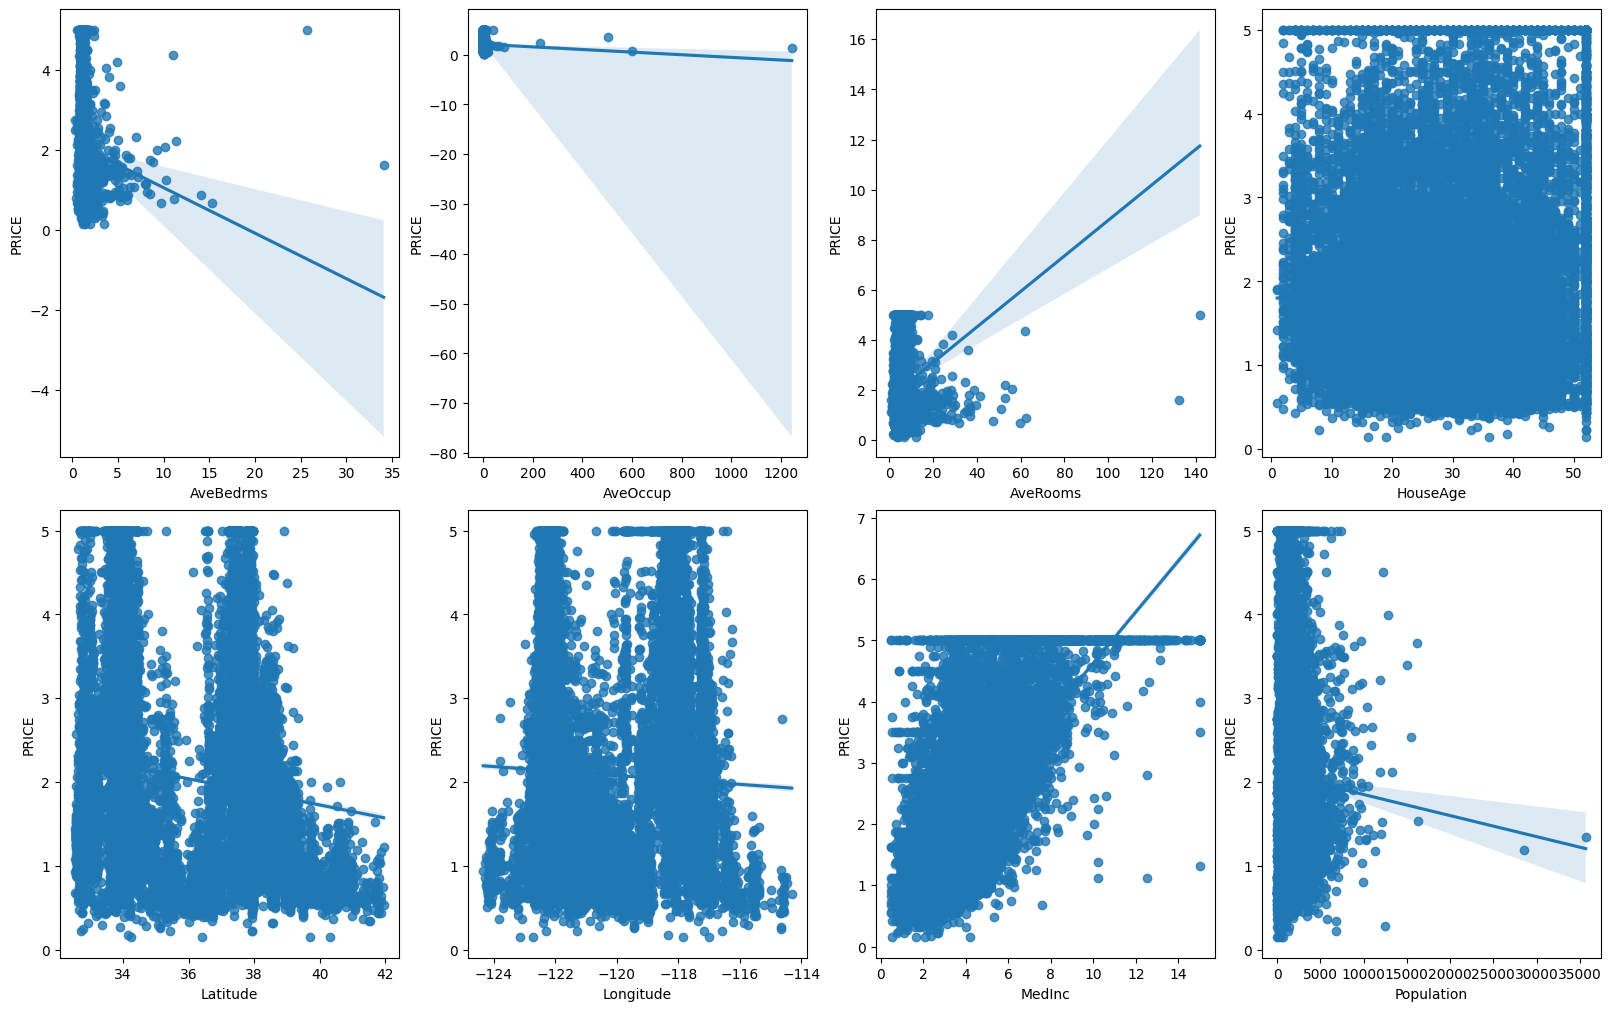

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize = (16, 10), ncols = 4, nrows = 2,
                        constrained_layout = True)
features = df.columns.difference(['PRICE'])

for i, feature in enumerate(features) :
  row = int(i / 4)
  col = i % 4

  # seaborn의 regplot을 이용해 산점도와 선형 회귀직선을 함께 시각화
  sns.regplot(x = feature, y = 'PRICE', data = df, ax = axs[row][col])